## Stock Price Prediction using LSTM

### Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

### Preprocessing

In [5]:
df_train = pd.read_csv('DataSet/Google_Stock_Price_Train.csv')

In [6]:
# extracting open stock prices 
training_set = df_train.iloc[:, 1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0,1))
training_set_scaled = ms.fit_transform(training_set)

In [8]:
# Data structure for RNN
X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train)
print(Y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [9]:
# converting to 3D
# we can add other indicators which are affecting the price of our stock price 
# (row, column, number of indicators)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building RNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# initialise
regressor = Sequential()

In [12]:
# Adding LSTM layer 
# input should be sequence length, no. of indicators 
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

In [13]:
# dropout regulaisation to avoid overfitting 
regressor.add(Dropout(0.2))

In [14]:
# second layer 
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
# third layer 
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
# Fourth layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(1))

In [18]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(x = X_train, y = Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 59ms/step - loss: 0.0642
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0042
Epoch 13/100
38/38 [====

### Prediction

In [20]:
df_test = pd.read_csv('DataSet/Google_Stock_Price_Test.csv')
real_Stock_price = df_test.iloc[:, 1:2].values

In [21]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)

In [31]:
inputs = df_total[len(df_total) - len(df_test) - 60: len(df_total)].values

C:\Users\Antriksh\AppData\Local\Temp\ipykernel_20844\1969624535.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = df_total[len(df_total) - len(df_test) - 60: len(df_total)].values


In [32]:
inputs.shape

(80,)

In [33]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(80, 1)

In [34]:
inputs = ms.transform(inputs)


In [36]:
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
pred_price = regressor.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [40]:
# the above will gives us scaled values so we will inverse scale this 
pred_price = ms.inverse_transform(pred_price)

### Evaluation & Visualisation

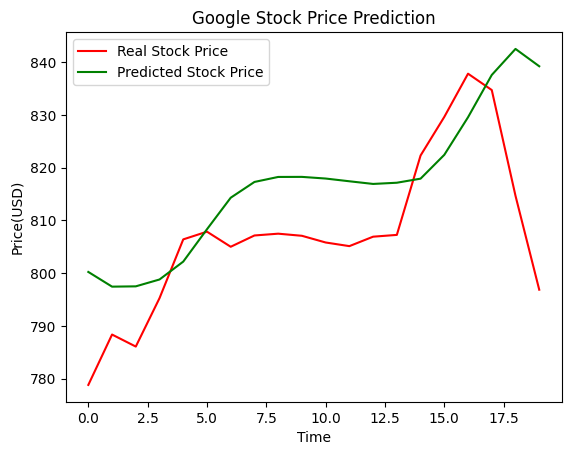

In [42]:
plt.plot(real_Stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(pred_price, color = 'green', label = 'Predicted Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price(USD)")
plt.legend()
plt.show()

In [43]:
# Thank You !!